In [1]:
def siglas(nome_time):
    if nome_time == 'Bauru':
        return 'BAU'
    
    elif nome_time == 'MOGI1':
        return 'MOG'
    
    elif nome_time == 'VipTech CMB':
        return 'CMO'
    
    elif nome_time == 'Brasília':
        return 'BSB'
    
    elif nome_time == 'Paulistano':
        return 'CAP'
    
    elif nome_time == 'Flamengo':
        return 'FLA'
    
    elif nome_time == 'Minas':
        return 'MIN'
    
    elif nome_time == 'UNIFACISA':
        return 'UFC'
    
    elif nome_time == 'Cerrado Basquete':
        return 'CER'
    
    elif nome_time == 'SESI Franca':
        return 'FRA'
    
    elif nome_time == 'Corinthians':
        return 'COR'
    
    elif nome_time == 'Pinheiros':
        return 'PIN'
    
    elif nome_time == 'Fortaleza B. C':
        return 'FOR'
    
    elif nome_time == 'KTO Caxias do Sul':
        return 'CAX'
    
    elif nome_time == 'Pato':
        return 'PAT'
    
    elif nome_time == 'São Paulo':
        return 'SPF'

# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

Colunas:
* Quartos
* Tempo
* placar_cada
* placar_visitante
* Nome
*


Coluna Indicadores técnicos:

* fim_quarto -> Fim de quarto (qualquer quarto)
* inicio_quarto -> Inicio de quarto (qualquer quarto)
* fim_partida  -> Fim da Partida
* incio partida -> Inicio da Partida
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* 3_T_Pts    -> Três Pontos Tentados
* 2_C_Pts    -> Dois Pontos Convertidos
* 2_T_Pts    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FC_T         -> Faltas Técnica
* FC_A         -> Faltas Antidesportiva
* FC_O       -> Faltas Ofensiva
* FC_D        -> Faltas Desqualificante
* Entra       -> Entrada na Substituição 
* Sai           -> Saida na Substituição 
* tempo_tecnico -> Tempo Técnico
* ER         -> Erros
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

In [2]:
# !pip install dataframe_image

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import re
import dataframe_image as dfi

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.collections import LineCollection

In [6]:
from fpdf import FPDF
from funcoes_relatorio_analises import *

In [7]:
%matplotlib inline

In [8]:
# df = pd.read_csv("tabela_1_VipTech CMB_x_Fortaleza B. C.1.csv")

In [9]:
# arquivo = "tabela_16_Corinthians_x_Paulistano.csv"
# arquivo = "tabela_45_KTO Caxias do Sul_x_Corinthians.csv"
arquivo = "tabela_37_Cerrado Basquete_x_KTO Caxias do Sul.csv"
# arquivo = "tabela_51_Flamengo_x_Brasília.csv"
# arquivo = "tabela_10_Bauru_x_Flamengo.csv"

In [10]:
df = pd.read_csv(arquivo)

In [11]:
expressao_regular = re.findall(r'[A-Z].*?[.]', arquivo)
expressao_regular

['Cerrado Basquete_x_KTO Caxias do Sul.']

In [12]:
expressao_regular = str(expressao_regular).strip('[]')
expressao_regular0 = expressao_regular.split('_x_')

### criar um df que identifique o Mogi e colocar mogi das cruzes 

In [13]:
casa = expressao_regular0[0]
nome_time_casa = casa.replace("'", "")
nome_time_casa

'Cerrado Basquete'

In [14]:
fora = expressao_regular0[1]
nome_time_fora = fora.replace(".'", "")
nome_time_fora

'KTO Caxias do Sul'

## Precisa colocar algumas informações básicas sobre o jogo para que completar a tabela 

### Mogi colocar MOGI1

In [15]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,67,63,NaN,fim_partida,NaN
1,1,4,00:00,67,63,NaN,fim_quarto,NaN
2,2,4,00:01,67,63,CAX,3_Pts_T,Da Silva
3,3,4,00:03,67,63,CER,LL_Pts_C,Fuller
4,4,4,00:03,66,63,CER,LL_Pts_C,Fuller
...,...,...,...,...,...,...,...,...
476,476,1,10:00,0,0,CER,substituicao_entra,Fuller
477,477,1,10:00,0,0,CER,substituicao_entra,Paulo
478,478,1,10:00,0,0,CER,substituicao_entra,Lucas Lima
479,479,1,10:00,0,0,CER,substituicao_entra,Sérgio


# Informações básicas sobre o jogo 

In [16]:
data_hoje = datetime.today().strftime('%d/%m/%Y')
dia_do_jogo = '02/01/2021'
temporada = 2019
sigla_time_a = siglas(nome_time_casa)
sigla_time_b = siglas(nome_time_fora)
casa = 'casa'
fora = 'fora'
classificatoria = '1 Turno'

In [17]:
arquivo = 'RELATORIO'
arquivo1 = f'informacoes_dos_times/{nome_time_casa}'
arquivo2 = f'informacoes_dos_times/{nome_time_fora}'
img_casa = f'{arquivo1}/{nome_time_casa}'
img_fora = f'{arquivo2}/{nome_time_fora}'

In [18]:
dia_do_jogo

'02/01/2021'

# Limpeza dos dados 

* primeiro evitar NAN (acredite!!! tem isso no site)

In [19]:
df.dropna(subset=['Tempo'], inplace=True)

* mudança do tempo
* colocar todos em segundos para facilitar a vida
* tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
* para isso localizei o valores errados e concertei

In [20]:
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [21]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [22]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [23]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [24]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [25]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 4.5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 5.5)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [26]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

#  Acrescentamos mais colunas

In [27]:
df['diferenca_placar_casa'] = df['placar_casa'] - df['placar_visitante']
df['diferenca_placar_visitante'] = df['placar_visitante'] - df['placar_casa']
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,67,63,NaN,fim_partida,NaN,4,-4
1,4,2400,67,63,NaN,fim_quarto,NaN,4,-4
2,4,2399,67,63,CAX,3_Pts_T,Da Silva,4,-4
3,4,2397,67,63,CER,LL_Pts_C,Fuller,4,-4
4,4,2397,66,63,CER,LL_Pts_C,Fuller,3,-3
...,...,...,...,...,...,...,...,...,...
476,1,0,0,0,CER,substituicao_entra,Fuller,0,0
477,1,0,0,0,CER,substituicao_entra,Paulo,0,0
478,1,0,0,0,CER,substituicao_entra,Lucas Lima,0,0
479,1,0,0,0,CER,substituicao_entra,Sérgio,0,0


In [28]:
df.to_csv('tempo2.csv')

# Analise da pontuação dos times

In [29]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') |
               (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
               (df['Indicador'] == 'LL_Pts_C')| (df['Indicador'] == 'LL_Pts_T') |
               (df['Indicador'] == 'EN')|
               (df['Indicador'] == 'fim_partida')]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,67,63,NaN,fim_partida,NaN,4,-4
2,4,2399,67,63,CAX,3_Pts_T,Da Silva,4,-4
3,4,2397,67,63,CER,LL_Pts_C,Fuller,4,-4
4,4,2397,66,63,CER,LL_Pts_C,Fuller,3,-3
8,4,2391,65,63,CAX,LL_Pts_T,Shilton,2,-2
...,...,...,...,...,...,...,...,...,...
458,1,86,0,3,CAX,LL_Pts_T,Shilton,-3,3
460,1,86,0,3,CAX,LL_Pts_C,Shilton,-3,3
465,1,59,0,2,CAX,2_Pts_C,Pedro,-2,2
467,1,48,0,0,CAX,3_Pts_T,Eddy,0,0


In [30]:
# estamos invertendo os valores para deixar parecido com o jogo
pontuacao = pontuacao[::-1]
pontuacao.reset_index(drop=True, inplace=True)
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,24,0,0,CER,2_Pts_T,Paulo,0,0
1,1,48,0,0,CAX,3_Pts_T,Eddy,0,0
2,1,59,0,2,CAX,2_Pts_C,Pedro,-2,2
3,1,86,0,3,CAX,LL_Pts_C,Shilton,-3,3
4,1,86,0,3,CAX,LL_Pts_T,Shilton,-3,3
...,...,...,...,...,...,...,...,...,...
143,4,2391,65,63,CAX,LL_Pts_T,Shilton,2,-2
144,4,2397,66,63,CER,LL_Pts_C,Fuller,3,-3
145,4,2397,67,63,CER,LL_Pts_C,Fuller,4,-4
146,4,2399,67,63,CAX,3_Pts_T,Da Silva,4,-4


In [31]:
# colocar a separação dos quartos nos gráficos
quartos_duplicados = df['Quarto'].unique()
if len(quartos_duplicados) == 4:
    quartos = [600, 1200, 1800, 2400]
elif len(quartos_duplicados) == 5:
    quartos = [600, 1200, 1800, 2400, 2700]
elif len(quartos_duplicados) == 6:
    quartos = [600, 1200, 1800, 2400, 2700, 3000]
elif len(quartos_duplicados) == 7:
    quartos = [600, 1200, 1800, 2400, 2700, 3300]

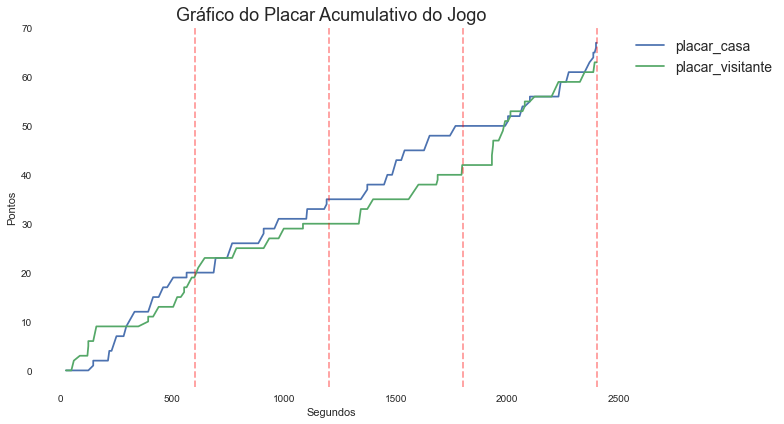

In [32]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(11,6))
tempo = pontuacao['Tempo']
pontuacao1 = pontuacao['placar_casa']
pontuacao2 = pontuacao['placar_visitante']
plt.plot(tempo, pontuacao1, label='placar_casa')
plt.plot(tempo, pontuacao2, label='placar_visitante')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.title('Gráfico do Placar Acumulativo do Jogo', fontsize=18)
plt.ylabel('Pontos')
plt.xlabel('Segundos')
plt.tight_layout()
plt.savefig('RELATORIO/teste.jpeg', format='jpg')

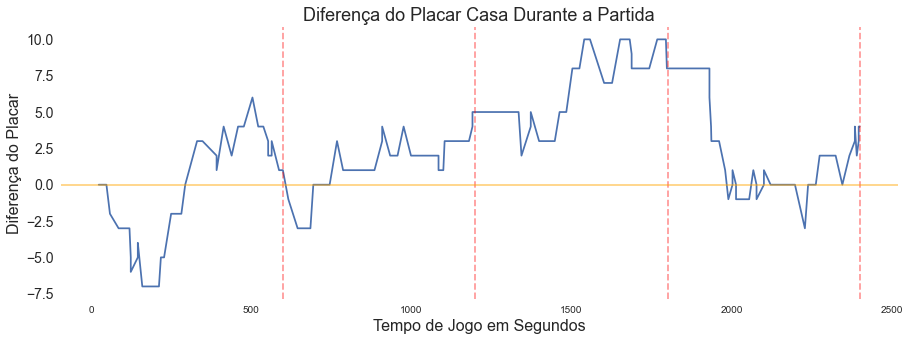

In [33]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_casa'], label = 'diferença do placar')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 14)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)
plt.savefig('RELATORIO/teste7.png', format='png')

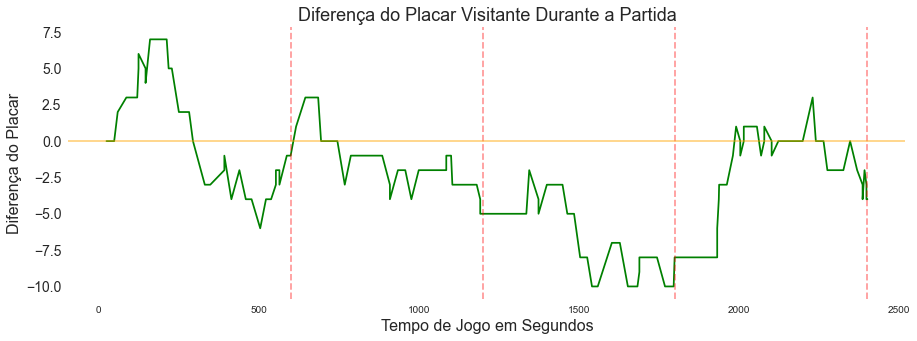

In [34]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'Jogadao',color='green')
plt.title('Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 14)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

# Análise da Posse de Bola dos times

#### precisa fazer mais uma conta 

como as paradas são realizadas no primeiro momento em que se realiza ponto, nós perdemos as ações anteriores antes desse ponto acontecer
- A ideia é encontrar os pontos realizado (isso já foi realizado)
- depois precisa pegar esse ponto inicial e comparar em qual posse de bola se encontra esse inicio 
- ai sim podemos pegar o início da posse das ações que aconteceram anteriormente 

In [35]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_T') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'FC_O')|                
                (df['Indicador'] == 'EN') | (df['Indicador'] == 'fim_partida')]

In [36]:
# estamos invertendo os valores para deixar parecido com o jogo
posse_bola = posse_bola[::-1]
posse_bola.reset_index(drop=True, inplace=True)
posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,24,0,0,CER,2_Pts_T,Paulo,0,0
1,1,48,0,0,CAX,3_Pts_T,Eddy,0,0
2,1,59,0,2,CAX,2_Pts_C,Pedro,-2,2
3,1,77,0,2,CER,ER,Fuller,-2,2
4,1,86,0,3,CAX,LL_Pts_C,Shilton,-3,3
...,...,...,...,...,...,...,...,...,...
172,4,2391,65,63,CAX,LL_Pts_T,Shilton,2,-2
173,4,2397,66,63,CER,LL_Pts_C,Fuller,3,-3
174,4,2397,67,63,CER,LL_Pts_C,Fuller,4,-4
175,4,2399,67,63,CAX,3_Pts_T,Da Silva,4,-4


In [37]:
posse_bola.to_csv('tempo2.csv')

# Está quase certo
# Só está errado o início e o final dos indicadores técnicos, mas da para consertar
# precisa analisar as situaçãos especiais (cesta e falta)

In [38]:
sigla_time_a

'CER'

In [39]:
sigla_time_b

'CAX'

In [40]:
lstime_b = [[]]
lstime_a = [[]]

for a in posse_bola.itertuples():
    if a.Time not in [sigla_time_b]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
            ]
            lstime_b.append(lss)
        else:
            pass

    if a.Time not in [sigla_time_a]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
            ]
            lstime_a.append(lss)
        else:
            pass

In [41]:
df_time_b = pd.DataFrame(
    lstime_b, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita"])

In [42]:
df_time_b

,Time,Tempo,Indicador,dif_casa,dif_visita
0,None,NaN,None,NaN,NaN
1,CAX,59.0,2_Pts_C,-2.0,2.0
2,CAX,95.0,ER,-3.0,3.0
3,CAX,124.0,LL_Pts_C,-6.0,6.0
4,CER,146.0,LL_Pts_C,-5.0,5.0
...,...,...,...,...,...
81,CAX,2379.0,ER,2.0,-2.0
82,CER,2385.0,LL_Pts_C,3.0,-3.0
83,CAX,2391.0,LL_Pts_T,2.0,-2.0
84,CER,2397.0,LL_Pts_C,3.0,-3.0


In [43]:
df_time_b.dropna(how="any", inplace=True, axis="index")
df_time_b = df_time_b[df_time_b.Time.str.contains(sigla_time_b)]

In [44]:
df_time_a = pd.DataFrame(
    lstime_a, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita"])

In [45]:
df_time_a.dropna(how="any", inplace=True, axis="index")
df_time_a = df_time_a[df_time_a.Time.str.contains(sigla_time_a)]

In [46]:
posse_de_bola = pd.concat([df_time_b, df_time_a], ignore_index=True)
posse_de_bola.sort_values(by="Tempo", inplace=True)
posse_de_bola.reset_index(inplace=True, drop=True)

In [47]:
posse_de_bola["Tempo"].loc[0]

24.0

In [48]:
tempo = posse_de_bola["Tempo"].diff()
tempo.loc[0] = posse_de_bola["Tempo"].loc[0]
posse_de_bola["Tempo"] = tempo
posse_de_bola

,Time,Tempo,Indicador,dif_casa,dif_visita
0,CER,24.0,2_Pts_T,0.0,0.0
1,CAX,35.0,2_Pts_C,-2.0,2.0
2,CER,18.0,ER,-2.0,2.0
3,CAX,18.0,ER,-3.0,3.0
4,CER,6.0,ER,-3.0,3.0
...,...,...,...,...,...
125,CAX,11.0,ER,2.0,-2.0
126,CER,6.0,LL_Pts_C,4.0,-4.0
127,CAX,6.0,LL_Pts_T,2.0,-2.0
128,CER,6.0,LL_Pts_C,4.0,-4.0


In [51]:
posse_de_bola.loc[:, ("diff_pontuacao")] = posse_de_bola.loc[:, ("dif_casa")].abs()
df_time_a.loc[:, ("diff_pontuacao")] = df_time_a.loc[:, ("dif_casa")].abs()
df_time_b.loc[:, ("diff_pontuacao")] = df_time_b.loc[:, ("dif_casa")].abs()

# Análises da posse de bola

In [ ]:
# sns.relplot(data=df_time_a, y='Tempo', x='diff_pontuacao')

In [ ]:
# sns.relplot(data=df_time_b, y='Tempo', x='diff_pontuacao', color='g')

In [ ]:
# sns.lmplot(data=df_time_a, y='Tempo', x='diff_pontuacao')

In [ ]:
# sns.lmplot(data=df_time_b, y='Tempo', x='diff_pontuacao')

In [ ]:
'''teste = posse_de_bola[posse_de_bola['Time']==sigla_time_a]
teste.reset_index(inplace=True,drop=True)
teste1 = posse_de_bola[posse_de_bola['Time']==sigla_time_b]
teste1.reset_index(inplace=True,drop=True)'''

In [ ]:
'''grafico_posse_time1 = teste
grafico_posse_time1.reset_index(inplace=True)
grafico_posse_time2 = teste1
grafico_posse_time2.reset_index(inplace=True)'''

In [55]:
lu_time_a = posse_de_bola
lu_time_a['Time_Novo'] = 0

In [56]:
for x in range(len(posse_de_bola)):
    if lu_time_a['Time'][x] == sigla_time_a:
        lu_time_a.loc[x, 'Time_Novo'] = lu_time_a['Tempo'][x]
    else:
        pass

In [57]:
lu_time_a

,Time,Tempo,Indicador,dif_casa,dif_visita,diff_pontuacao,Time_Novo
0,CER,24.0,2_Pts_T,0.0,0.0,0.0,24.0
1,CAX,35.0,2_Pts_C,-2.0,2.0,2.0,0.0
2,CER,18.0,ER,-2.0,2.0,2.0,18.0
3,CAX,18.0,ER,-3.0,3.0,3.0,0.0
4,CER,6.0,ER,-3.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...
125,CAX,11.0,ER,2.0,-2.0,2.0,0.0
126,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,6.0
127,CAX,6.0,LL_Pts_T,2.0,-2.0,2.0,0.0
128,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,6.0


In [58]:
grafico_posse_time1 = lu_time_a
grafico_posse_time1.reset_index(inplace=True)

In [59]:
grafico_posse_time1

,index,Time,Tempo,Indicador,dif_casa,dif_visita,diff_pontuacao,Time_Novo
0,0,CER,24.0,2_Pts_T,0.0,0.0,0.0,24.0
1,1,CAX,35.0,2_Pts_C,-2.0,2.0,2.0,0.0
2,2,CER,18.0,ER,-2.0,2.0,2.0,18.0
3,3,CAX,18.0,ER,-3.0,3.0,3.0,0.0
4,4,CER,6.0,ER,-3.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...
125,125,CAX,11.0,ER,2.0,-2.0,2.0,0.0
126,126,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,6.0
127,127,CAX,6.0,LL_Pts_T,2.0,-2.0,2.0,0.0
128,128,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,6.0


In [60]:
x = grafico_posse_time1['index']
my_xticks = x
frequency = 10

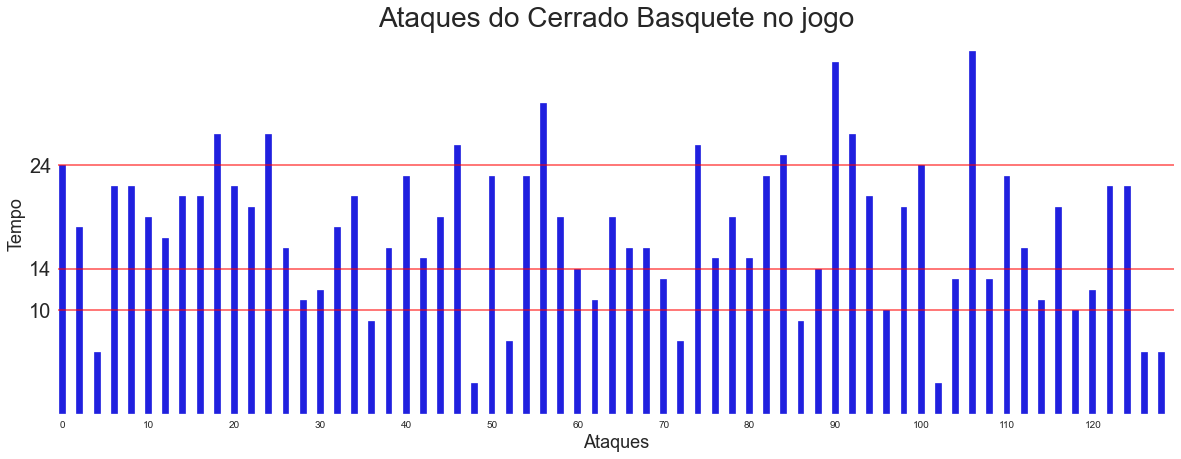

In [61]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time1, color='b')
plt.title(f'Ataques do {nome_time_casa} no jogo', fontsize=28)
plt.yticks([10,14,24], fontsize=20)
plt.ylabel('Tempo', fontsize=18)
plt.xlabel('Ataques', fontsize=18)
plt.xticks(x[::frequency], my_xticks[::frequency])
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste3.png', format='png')

In [62]:
lu_time_b = posse_de_bola
lu_time_b['Time_Novo'] = 0

In [63]:
for x in range(len(posse_de_bola)):
    if lu_time_b['Time'][x] == sigla_time_b:
        lu_time_b.loc[x,'Time_Novo'] = lu_time_b['Tempo'][x]
    else:
        pass

In [64]:
lu_time_b

,index,Time,Tempo,Indicador,dif_casa,dif_visita,diff_pontuacao,Time_Novo
0,0,CER,24.0,2_Pts_T,0.0,0.0,0.0,0.0
1,1,CAX,35.0,2_Pts_C,-2.0,2.0,2.0,35.0
2,2,CER,18.0,ER,-2.0,2.0,2.0,0.0
3,3,CAX,18.0,ER,-3.0,3.0,3.0,18.0
4,4,CER,6.0,ER,-3.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...
125,125,CAX,11.0,ER,2.0,-2.0,2.0,11.0
126,126,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,0.0
127,127,CAX,6.0,LL_Pts_T,2.0,-2.0,2.0,6.0
128,128,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,0.0


In [65]:
grafico_posse_time2 = lu_time_b
grafico_posse_time2.reset_index(inplace=True)

In [66]:
grafico_posse_time2

,level_0,index,Time,Tempo,Indicador,dif_casa,dif_visita,diff_pontuacao,Time_Novo
0,0,0,CER,24.0,2_Pts_T,0.0,0.0,0.0,0.0
1,1,1,CAX,35.0,2_Pts_C,-2.0,2.0,2.0,35.0
2,2,2,CER,18.0,ER,-2.0,2.0,2.0,0.0
3,3,3,CAX,18.0,ER,-3.0,3.0,3.0,18.0
4,4,4,CER,6.0,ER,-3.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
125,125,125,CAX,11.0,ER,2.0,-2.0,2.0,11.0
126,126,126,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,0.0
127,127,127,CAX,6.0,LL_Pts_T,2.0,-2.0,2.0,6.0
128,128,128,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,0.0


In [67]:
x2 = grafico_posse_time2['index']
my_xticks2 = x2
frequency2 = 10

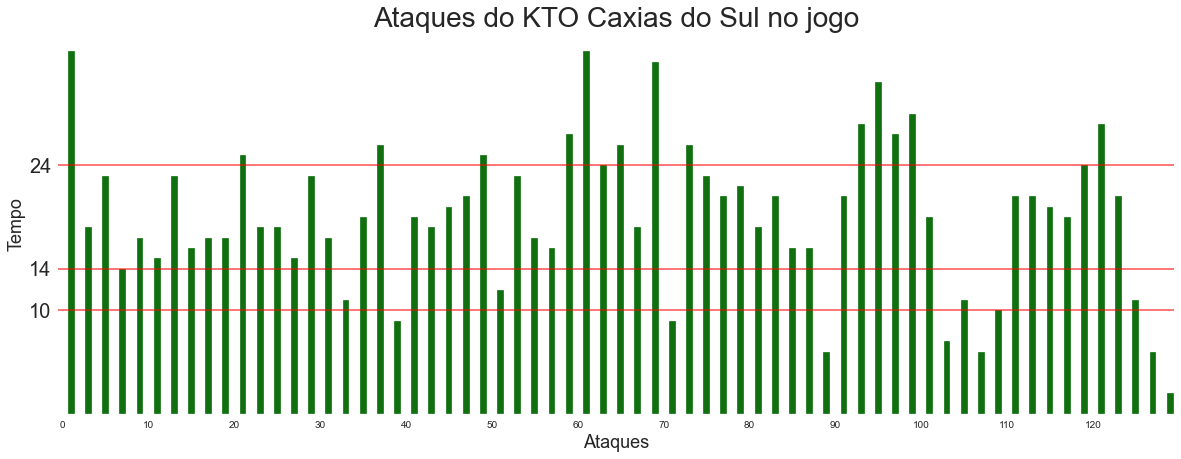

In [68]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time2, color='g')
plt.title(f'Ataques do {nome_time_fora} no jogo', fontsize=28)
plt.yticks([10,14,24], fontsize=20)
plt.ylabel('Tempo', fontsize=18)
plt.xlabel('Ataques', fontsize=18)
plt.xticks(x2[::frequency2], my_xticks2[::frequency2])
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste4.png', format='png')

In [69]:
posse_de_bola

,level_0,index,Time,Tempo,Indicador,dif_casa,dif_visita,diff_pontuacao,Time_Novo
0,0,0,CER,24.0,2_Pts_T,0.0,0.0,0.0,0.0
1,1,1,CAX,35.0,2_Pts_C,-2.0,2.0,2.0,35.0
2,2,2,CER,18.0,ER,-2.0,2.0,2.0,0.0
3,3,3,CAX,18.0,ER,-3.0,3.0,3.0,18.0
4,4,4,CER,6.0,ER,-3.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
125,125,125,CAX,11.0,ER,2.0,-2.0,2.0,11.0
126,126,126,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,0.0
127,127,127,CAX,6.0,LL_Pts_T,2.0,-2.0,2.0,6.0
128,128,128,CER,6.0,LL_Pts_C,4.0,-4.0,4.0,0.0


In [70]:
soma_a = df_time_a['Indicador'].value_counts().sum()
soma_b = df_time_b['Indicador'].value_counts().sum()

In [71]:
contagem = pd.DataFrame()

In [72]:
contagem = contagem.append(df_time_a['Indicador'].value_counts(), ignore_index=True)
contagem = contagem.append(df_time_b['Indicador'].value_counts(), ignore_index=True)

In [73]:
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T,EN
0,11.0,9.0,8.0,14.0,13.0,9.0,1.0,NaN
1,13.0,13.0,4.0,8.0,15.0,8.0,3.0,1.0


In [74]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna = []
for i in contagem:
    valores_coluna.append(i)
    
if 'EN' not in valores_coluna:
    contagem['EN'] = [0.0, 0.0]
if 'LL_Pts_T' not in valores_coluna:
    contagem['LL_Pts_T'] = [0.0, 0.0]
if 'LL_Pts_C' not in valores_coluna:
    contagem['LL_Pts_C'] = [0.0, 0.0]
# substituir os valores NAN por 0(zero)
contagem.fillna(0, inplace=True)

In [75]:
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T,EN
0,11.0,9.0,8.0,14.0,13.0,9.0,1.0,0.0
1,13.0,13.0,4.0,8.0,15.0,8.0,3.0,1.0


In [76]:
contagem.loc[0, '2_Pts_C'] = contagem['2_Pts_C'][0] + contagem['EN'][0]
contagem.loc[1, '2_Pts_C'] = contagem['2_Pts_C'][1] + contagem['EN'][1]

In [77]:
contagem.drop('EN', inplace=True, axis=1)

In [78]:
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T
0,11.0,9.0,8.0,14.0,13.0,9.0,1.0
1,14.0,13.0,4.0,8.0,15.0,8.0,3.0


In [79]:
contagem.rename(columns={"2_Pts_T": "2_Pts_E", "3_Pts_T": "3_Pts_E", "LL_Pts_T": "LL_Pts_E"}, inplace=True)

In [80]:
contagem['2_Pts_T'] = contagem['2_Pts_C'] + contagem['2_Pts_E']
contagem['3_Pts_T'] = contagem['3_Pts_C'] + contagem['3_Pts_E']
contagem['LL_Pts_T'] = contagem['LL_Pts_C'] + contagem['LL_Pts_E']

In [81]:
contagem['Time'] = [sigla_time_a, sigla_time_b]
contagem['posse'] = [soma_a, soma_b]
contagem['%2_Pts_C'] = [round((contagem['2_Pts_C'][0]/soma_a)*100), round((contagem['2_Pts_C'][1]/soma_b)*100)]
contagem['%2_Pts_E'] = [round((contagem['2_Pts_E'][0]/soma_a)*100), round((contagem['2_Pts_E'][1]/soma_b)*100)]
contagem['%3_Pts_C'] = [round((contagem['3_Pts_C'][0]/soma_a)*100), round((contagem['3_Pts_C'][1]/soma_b)*100)]
contagem['%3_Pts_E'] = [round((contagem['3_Pts_E'][0]/soma_a)*100), round((contagem['3_Pts_E'][1]/soma_b)*100)]
contagem['%LL_Pts_C'] = [round((contagem['LL_Pts_C'][0]/soma_a)*100), round((contagem['LL_Pts_C'][1]/soma_b)*100)]
contagem['%LL_Pts_E'] = [round((contagem['LL_Pts_E'][0]/soma_a)*100), round((contagem['LL_Pts_E'][1]/soma_b)*100)]
contagem['Tempo_de_posse'] = [(round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_a].Tempo.sum()/60)),
                              (round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_b].Tempo.sum()/60))]
contagem['Ataques/min'] = [(round(contagem['posse'][0]/contagem['Tempo_de_posse'][0], 2)),
                           (round(contagem['posse'][1]/contagem['Tempo_de_posse'][1], 2))]

In [82]:
contagem = contagem[['Time', 'posse', 'Tempo_de_posse', 'Ataques/min',
                     '2_Pts_C', '2_Pts_E', '2_Pts_T',
                     '3_Pts_C', '3_Pts_E', '3_Pts_T',
                     'LL_Pts_C', 'LL_Pts_E', 'LL_Pts_T',
                     '%2_Pts_C', '%2_Pts_E', '%3_Pts_C',
                     '%3_Pts_E', '%LL_Pts_C', '%LL_Pts_E']]

In [83]:
contagem

,Time,posse,Tempo_de_posse,Ataques/min,2_Pts_C,2_Pts_E,2_Pts_T,3_Pts_C,3_Pts_E,3_Pts_T,LL_Pts_C,LL_Pts_E,LL_Pts_T,%2_Pts_C,%2_Pts_E,%3_Pts_C,%3_Pts_E,%LL_Pts_C,%LL_Pts_E
0,CER,65,19.0,3.42,11.0,9.0,20.0,8.0,14.0,22.0,9.0,1.0,10.0,17.0,14.0,12.0,22.0,14.0,2.0
1,CAX,65,21.0,3.10,14.0,13.0,27.0,4.0,8.0,12.0,8.0,3.0,11.0,22.0,20.0,6.0,12.0,12.0,5.0


In [102]:
# tempo de ataque separado por cada ataque 
tempos = ('0-5', '5-10', '10-14', '14-24', '24+')
ataques = pd.DataFrame(np.random.randn(5, 2),
                       index=tempos, columns=[f'{sigla_time_a}', f'{sigla_time_b}'])

In [103]:
ataques

,CAX,CAX
0-5,0.647237,0.871563
5-10,0.507847,1.566153
10-14,0.195407,-0.481153
14-24,-1.283923,0.316508
24+,0.213178,3.563127


In [98]:
posse_de_bola_b = posse_de_bola[posse_de_bola['Time'] == sigla_time_b]
valores_b = len(posse_de_bola_b[posse_de_bola_b['Tempo'] <= 5])
valores_b

,level_0,index,Time,Tempo,Indicador,dif_casa,dif_visita,diff_pontuacao,Time_Novo
1,1,1,CAX,35.0,2_Pts_C,-2.0,2.0,2.0,35.0
3,3,3,CAX,18.0,ER,-3.0,3.0,3.0,18.0
5,5,5,CAX,23.0,LL_Pts_C,-6.0,6.0,6.0,23.0
7,7,7,CAX,14.0,3_Pts_C,-7.0,7.0,7.0,14.0
9,9,9,CAX,17.0,ER,-7.0,7.0,7.0,17.0
...,...,...,...,...,...,...,...,...,...
121,121,121,CAX,28.0,3_Pts_T,2.0,-2.0,2.0,28.0
123,123,123,CAX,21.0,2_Pts_C,0.0,0.0,0.0,21.0
125,125,125,CAX,11.0,ER,2.0,-2.0,2.0,11.0
127,127,127,CAX,6.0,LL_Pts_T,2.0,-2.0,2.0,6.0


In [101]:
posse_de_bola_a = posse_de_bola[posse_de_bola['Time'] == sigla_time_a]
valores_a = len(posse_de_bola_a[posse_de_bola_a['Tempo'] <= 5])
valores_a

2

In [ ]:
aaaaaaaaaaaaa

# Analisar os períodos positivos dos times

In [ ]:
# Criar um novo dataFrame para analisar os períodos positivos dos times
data = pd.DataFrame()
data['Time'] = pontuacao['Time']
data['Indicador'] = pontuacao['Indicador']
data['diff_pontuacao'] = pontuacao['diferenca_placar_visitante']
data['Tempo'] = pontuacao['Tempo']
data

In [ ]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
data["pontuacao"] = data["diff_pontuacao"].diff()
data["pontuacao"] = data["pontuacao"].apply(lambda x: abs(x))

In [ ]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = data["diff_pontuacao"][0]
data.loc[0, 'pontuacao'] = abs(novo_valor)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data['pontuacao'] = data['pontuacao'].astype(int)
data.head(15)

In [ ]:
data.to_csv('tempo2.csv')

In [ ]:
# esse df é usado para retirar alguns argumentos que não fazem diferença 
# na função abaixo retiramos as listas vazias que o loop gera quando o time se repete 
def remove_item(my_list,*args):
    deletar = list(args)
    for item in deletar:
        while item in my_list:
            my_list.remove(item)
    return my_list

# preciso entender como funciona o while com o for juntos e também os df

In [ ]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# valores finais da posse de bola
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
# identifica o tempo final
tempo_a_fim = 0
tempo_b_fim = 0
# utilizado para agrupar os valores da pontuação dos times
time_a = []
time_b = []
# utilizados para somar os valores agrupados da pontuação 
soma_a = []
soma_b = []

for i in range(len(data)):
    # caso corresponda ao nome do time A
    if data['Time'][i] == sigla_time_a:
        # adiciona o valor da pontuação
        time_a.append(data['pontuacao'][i])
        ##########################################
        # pegam os valores acumulados do time B e as soma
        soma_b.append(sum(time_b))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_b = []
        # remove esses valores zerados
        soma_b = remove_item(soma_b, 0)
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # o loop do Time B é terminado 
            tempo_b_peridodo_final.append(tempo_b_fim)
            # pega o primeiro valor do tempo de início
            tempo_a_fim = data['Tempo'][i]            
            flag = 1
        else:
            tempo_a_fim = data['Tempo'][i]
            flag = 1
    # caso corresponda ao nome do time B
    elif data['Time'][i] == sigla_time_b:
        # adiciona o valor da pontuação
        time_b.append(data['pontuacao'][i])
        #####################################################
        # pegam os valores acumulados do time A e as soma
        soma_a.append(sum(time_a))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_a = []
        # remove esses valores zerados
        soma_a = remove_item(soma_a, 0)
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # o loop do Time A é terminado 
            tempo_a_peridodo_final.append(tempo_a_fim)
            # pega o primeiro valor do tempo final
            tempo_b_fim = data['Tempo'][i]
            flag = 0
        else:
            tempo_b_fim = data['Tempo'][i]
            flag = 0
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados
        ultima_linha = data['Tempo'][i]
        if flag != 1:
            tempo_b_peridodo_final.append(tempo_b_fim)
            # aplicamos as ultimas somas  para cada time
            # e removemos os valores que estão zerados 
            soma_b.append(sum(time_b))
            soma_b = remove_item(soma_b, 0)
            soma_a.append(np.nan)
        else:
            tempo_a_peridodo_final.append(tempo_a_fim)
            # aplicamos as ultimas somas  para cada time
            # e removemos os valores que estão zerados 
            soma_a.append(sum(time_a))
            soma_a = remove_item(soma_a, 0)
            soma_b.append(np.nan)

In [ ]:
len(soma_a)

In [ ]:
len(soma_b)

In [ ]:
len(tempo_a_peridodo_final)

In [ ]:
len(tempo_b_peridodo_final)

In [ ]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_peridodo_final) < len(tempo_b_peridodo_final):
    # o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
    tempo_a_peridodo_final.append(ultima_linha)
    nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
    posse_de_bola_A = pd.DataFrame()
    posse_de_bola_A['Time'] = nome_time_A
    posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
    posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
    posse_de_bola_A['Soma_Pontuacao'] = soma_a
    ########################################################################
    del(tempo_b_peridodo_final[0])
    tempo_b_peridodo_final.append(ultima_linha)
    soma_b.append(np.nan)
    nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
    posse_de_bola_B = pd.DataFrame()
    posse_de_bola_B['Time'] = nome_time_B
    posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
    posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
    posse_de_bola_B['Soma_Pontuacao'] = soma_b

In [ ]:
# e acrescenta no a e agora tb acrescenta no B
if len(tempo_a_peridodo_final) > len(tempo_b_peridodo_final):
    tempo_b_peridodo_final.append(ultima_linha)
    nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
    posse_de_bola_B = pd.DataFrame()
    posse_de_bola_B['Time'] = nome_time_B
    posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
    posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
    posse_de_bola_B['Soma_Pontuacao'] = soma_b
    ###############################################################
    del(tempo_a_peridodo_final[0])
    tempo_a_peridodo_final.append(ultima_linha)
    soma_a.append(np.nan)
    nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
    posse_de_bola_A = pd.DataFrame()
    posse_de_bola_A['Time'] = nome_time_A
    posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
    posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
    posse_de_bola_A['Soma_Pontuacao'] = soma_a

In [ ]:
if len(tempo_a_peridodo_final) == len(tempo_b_peridodo_final):
    if tempo_a_peridodo_final[0] == 0:
        nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
        posse_de_bola_B = pd.DataFrame()
        posse_de_bola_B['Time'] = nome_time_B
        posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
        posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        posse_de_bola_B['Soma_Pontuacao'] = soma_b
        #######################################
        del(tempo_a_peridodo_final[0])
        tempo_a_peridodo_final.append(ultima_linha)
        nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
        posse_de_bola_A = pd.DataFrame()
        posse_de_bola_A['Time'] = nome_time_A
        posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
        posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        posse_de_bola_A['Soma_Pontuacao'] = soma_a
    elif tempo_b_peridodo_final[0] == 0:
        nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
        posse_de_bola_A = pd.DataFrame()
        posse_de_bola_A['Time'] = nome_time_A
        posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
        posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        posse_de_bola_A['Soma_Pontuacao'] = soma_a
        #######################################
        del(tempo_b_peridodo_final[0])
        tempo_b_peridodo_final.append(ultima_linha)
        nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
        posse_de_bola_B = pd.DataFrame()
        posse_de_bola_B['Time'] = nome_time_B
        posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
        posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        posse_de_bola_B['Soma_Pontuacao'] = soma_b

In [ ]:
posse_de_bola_A

In [ ]:
posse_de_bola_B

In [ ]:
posse_de_bola_bruta = pd.concat([posse_de_bola_A, posse_de_bola_B], ignore_index=True)

In [ ]:
posse_de_bola_bruta.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [ ]:
posse_de_bola_bruta["diff_pontuacao"] = posse_de_bola_bruta["Soma_Pontuacao"].diff()
posse_de_bola_bruta.head(10)

In [ ]:
periodos_posteriores = []
for i in range(len(posse_de_bola_bruta)):
    if posse_de_bola_bruta['Soma_Pontuacao'][i] >= 5:
        periodo_potencial_a_positivo = 1
    else:
        if (posse_de_bola_bruta['diff_pontuacao'][i] <= -4) & (posse_de_bola_bruta['Soma_Pontuacao'][i] < 3):
            periodos_posteriores.append(posse_de_bola_bruta['Tempo_de_Inicio'][i])
            if periodo_potencial_a_positivo == 1:
                periodo_potencial_a_positivo = 0
            elif periodo_potencial_a_positivo != 1:
                periodo_potencial_a_positivo = 0

In [ ]:
periodos_posteriores

In [ ]:
periodos_iniciais = posse_de_bola_bruta[~posse_de_bola_bruta['Tempo_de_Inicio'].isin(periodos_posteriores)]
periodos_iniciais.reset_index(inplace=True, drop=True)
periodos_iniciais.head(10)

In [ ]:
flag = -1
tempo_a_peridodo_inicial = []
tempo_b_peridodo_inicial = []
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
pontuação_a = []
pontuação_b = []
nome_time_A = []
nome_time_B = []
# como o time do flamengo começa, o time de minas não apresenta o primeiro valor
# por causa disso é acrescentado um valor 0 que não existe 
potencial_final_periodo_a = 0
potencial_final_periodo_b = 0

for i in range(len(periodos_iniciais)):
    if periodos_iniciais['Time'][i] == sigla_time_a:
        if flag != 1:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_a_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_A.append(periodos_iniciais['Time'][i])
            pontuação_a.append(periodos_iniciais['Soma_Pontuacao'][i])
            ##################################################################
            tempo_b_peridodo_final.append(potencial_final_periodo_b)
            flag = 1
        else:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 1
    else:
        if flag != 0:
            tempo_a_peridodo_final.append(potencial_final_periodo_a)
            ############################################################
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_b_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_B.append(periodos_iniciais['Time'][i])
            pontuação_b.append(periodos_iniciais['Soma_Pontuacao'][i])
            flag = 0
        else:
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 0

In [ ]:
len(tempo_b_peridodo_inicial)

In [ ]:
len(tempo_a_peridodo_inicial)

In [ ]:
if len(tempo_a_peridodo_final) == len(tempo_b_peridodo_final):
    if tempo_a_peridodo_final[0] == 0:
        periodos_B = pd.DataFrame()
        periodos_B['Time'] = nome_time_B
        periodos_B['Tempo_de_Inicio'] = tempo_b_peridodo_inicial
        periodos_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        periodos_B['Soma_Pontuacao'] = pontuação_b
        #######################################
        del(tempo_a_peridodo_final[0])
        tempo_a_peridodo_final.append(ultima_linha)
        periodos_A = pd.DataFrame()
        periodos_A['Time'] = nome_time_A
        periodos_A['Tempo_de_Inicio'] = tempo_a_peridodo_inicial
        periodos_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        periodos_A['Soma_Pontuacao'] = pontuação_a
    elif tempo_b_peridodo_final[0] == 0:
        periodos_A = pd.DataFrame()
        periodos_A['Time'] = nome_time_A
        periodos_A['Tempo_de_Inicio'] = tempo_a_peridodo_inicial
        periodos_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        periodos_A['Soma_Pontuacao'] = pontuação_a
        #######################################
        del(tempo_b_peridodo_final[0])
        tempo_b_peridodo_final.append(ultima_linha)
        periodos_B = pd.DataFrame()
        periodos_B['Time'] = nome_time_B
        periodos_B['Tempo_de_Inicio'] = tempo_b_peridodo_inicial
        periodos_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        periodos_B['Soma_Pontuacao'] = pontuação_b

In [ ]:
periodo = pd.concat([periodos_A, periodos_B], ignore_index=True)

In [ ]:
periodo.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)
periodo.head()

In [ ]:
periodo_final_a = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_a)]
periodo_final_a

In [ ]:
periodo_final_a_inicio = list(periodo_final_a['Tempo_de_Inicio'])
periodo_final_a_final = list(periodo_final_a['Tempo_de_Termino'])

In [ ]:
periodo_final_a_inicio

In [ ]:
periodo_final_a_final

In [ ]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_casa'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_a_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_a_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste1.jpeg', format='jpg')

In [ ]:
periodo_final_b = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_b)]

In [ ]:
periodo_final_b_inicio = list(periodo_final_b['Tempo_de_Inicio'])
periodo_final_b_final = list(periodo_final_b['Tempo_de_Termino'])

In [ ]:
periodo_final_b_inicio

In [ ]:
periodo_final_b_final

In [ ]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_b_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_b_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste2.jpeg', format='jpg')

# Tabela de dados geral

In [ ]:
Tabela_Geral = df[['Time','Indicador','Nome']]

In [ ]:
Tabela_Geral

In [ ]:
Tabela_Geral_Time1 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_a]
Tabela_Geral_Time2 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_b]

In [ ]:
Tabela_Geral_Time1

In [ ]:
tabela_time1 = Tabela_Geral_Time1.groupby(['Nome', 'Indicador']).count()
tabela_time2 = Tabela_Geral_Time2.groupby(['Nome', 'Indicador']).count()

In [ ]:
tabela_time1

In [ ]:
tabela_time2

In [ ]:
tabela_time1_pivot = tabela_time1.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T
tabela_time2_pivot = tabela_time2.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T

In [ ]:
tabela_time1_pivot

In [ ]:
tabela_time2_pivot

In [ ]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time1 = []
for i in tabela_time1_pivot:
    valores_coluna_time1.append(i)

tamanho_df_pivot = len(tabela_time1_pivot)
if 'TO' not in valores_coluna_time1:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time1:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time1:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time1:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_A'] = fca
if 'EN' not in valores_coluna_time1:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['EN'] = en
if 'LL_Pts_C' not in valores_coluna_time1:
    llc = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['LL_Pts_C'] = llc
if 'LL_Pts_T' not in valores_coluna_time1:
    llt = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['LL_Pts_T'] = llt

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Time'] = nome_time_casa0

nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Oponente'] = nome_time_fora0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Data'] = dia_do_jogo0

casa0 = [casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Casa/Fora'] = casa0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Classificatoria/Playoffs'] = classificatoria0

In [ ]:
tabela_time1_pivot.reset_index(inplace=True)
tabela_time1_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time1_pivot

In [ ]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time2 = []
for i in tabela_time2_pivot:
    valores_coluna_time2.append(i)

tamanho_df_pivot = len(tabela_time2_pivot)
if 'TO' not in valores_coluna_time2:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time2:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time2:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time2:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_A'] = fca
if 'EN'not in valores_coluna_time2:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['EN'] = en
if 'LL_Pts_C' not in valores_coluna_time2:
    llc = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['LL_Pts_C'] = llc
if 'LL_Pts_T' not in valores_coluna_time2:
    llt = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['LL_Pts_T'] = llt
    
nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Time'] = nome_time_fora0

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Oponente'] = nome_time_casa0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Data'] = dia_do_jogo0

fora0 = [fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Casa/Fora'] = fora0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Classificatoria/Playoffs'] = classificatoria0  

In [ ]:
tabela_time2_pivot.reset_index(inplace=True)
tabela_time2_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time2_pivot.head(5)

### criar um novo data frame e agregar a soma

In [ ]:
Time1_Final = pd.DataFrame()

In [ ]:
Time1_Final['Time'] = tabela_time1_pivot['Time']
Time1_Final['Oponente'] = tabela_time1_pivot['Oponente']
Time1_Final['Data'] = tabela_time1_pivot['Data']
Time1_Final['Casa/Fora'] = tabela_time1_pivot['Casa/Fora']
Time1_Final['Classificatoria/Playoffs'] = tabela_time1_pivot['Classificatoria/Playoffs']
Time1_Final['Nome'] = tabela_time1_pivot['Nome']
Time1_Final['Pts_3_C'] = tabela_time1_pivot['3_Pts_C'] * 3
Time1_Final['Pts_3_T'] = (tabela_time1_pivot['3_Pts_T'] + tabela_time1_pivot['3_Pts_C']) * 3
Time1_Final['Pts_2_C'] = (tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['Pts_2_T'] = (tabela_time1_pivot['2_Pts_T'] + tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['LL_C'] = tabela_time1_pivot['LL_Pts_C']
Time1_Final['LL_T'] = tabela_time1_pivot['LL_Pts_T'] + tabela_time1_pivot['LL_Pts_C']
Time1_Final['RO'] = tabela_time1_pivot['RO']
Time1_Final['RD'] = tabela_time1_pivot['RD']
Time1_Final['RT'] = tabela_time1_pivot['RO'] + tabela_time1_pivot['RD']
Time1_Final['AS'] = tabela_time1_pivot['AS']
Time1_Final['BR'] = tabela_time1_pivot['BR']
Time1_Final['TO'] = tabela_time1_pivot['TO']
Time1_Final['FC'] = tabela_time1_pivot['FC'] + tabela_time1_pivot['FC_T']+tabela_time1_pivot['FC_O']+tabela_time1_pivot['FC_A']
Time1_Final['FR'] = tabela_time1_pivot['FR']
Time1_Final['ER'] = tabela_time1_pivot['ER']
Time1_Final['EN'] = tabela_time1_pivot['EN']
Time1_Final['substituicao_entra'] = tabela_time1_pivot['substituicao_entra']
Time1_Final['substituicao_sai'] = tabela_time1_pivot['substituicao_sai']

In [ ]:
Time1_Final['Ar_Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] -  Time1_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time1_Final['Ar_Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] # NÃO contabiliza EN
Time1_Final['Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] + Time1_Final['LL_C']
Time1_Final['Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] + Time1_Final['LL_T']
# mudar os nomes para ações coletivas
Time1_Final['Nome'].replace(nome_time_casa, 'Açõe coletivas', inplace=True)

In [ ]:
Time1_Final['posse_de_bola'] = round(Time1_Final['Ar_Pts_T'] - Time1_Final['RO'] + Time1_Final['ER'] + (0.4 * Time1_Final['LL_T']), 0)
Time1_Final

In [ ]:
Time2_Final = pd.DataFrame()

In [ ]:
Time2_Final['Time'] = tabela_time2_pivot['Time']
Time2_Final['Oponente'] = tabela_time2_pivot['Oponente']
Time2_Final['Data'] = tabela_time2_pivot['Data']
Time2_Final['Casa/Fora'] = tabela_time2_pivot['Casa/Fora']
Time2_Final['Classificatoria/Playoffs'] = tabela_time2_pivot['Classificatoria/Playoffs']
Time2_Final['Nome'] = tabela_time2_pivot['Nome']
Time2_Final['Pts_3_C'] = tabela_time2_pivot['3_Pts_C'] * 3
Time2_Final['Pts_3_T'] = (tabela_time2_pivot['3_Pts_T'] + tabela_time2_pivot['3_Pts_C']) * 3
Time2_Final['Pts_2_C'] = (tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['Pts_2_T'] = (tabela_time2_pivot['2_Pts_T'] + tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['LL_C'] = tabela_time2_pivot['LL_Pts_C']
Time2_Final['LL_T'] = tabela_time2_pivot['LL_Pts_T'] + tabela_time2_pivot['LL_Pts_C']
Time2_Final['RO'] = tabela_time2_pivot['RO']
Time2_Final['RD'] = tabela_time2_pivot['RD']
Time2_Final['RT'] = tabela_time2_pivot['RO'] + tabela_time2_pivot['RD']
Time2_Final['AS'] = tabela_time2_pivot['AS']
Time2_Final['BR'] = tabela_time2_pivot['BR']
Time2_Final['TO'] = tabela_time2_pivot['TO']
Time2_Final['FC'] = tabela_time2_pivot['FC'] + tabela_time2_pivot['FC_T']+tabela_time2_pivot['FC_O']+tabela_time2_pivot['FC_A']
Time2_Final['FR'] = tabela_time2_pivot['FR']
Time2_Final['ER'] = tabela_time2_pivot['ER']
Time2_Final['EN'] = tabela_time2_pivot['EN']
Time2_Final['substituicao_entra'] = tabela_time2_pivot['substituicao_entra']
Time2_Final['substituicao_sai'] = tabela_time2_pivot['substituicao_sai']

In [ ]:
Time2_Final['Ar_Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] -  Time2_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time2_Final['Ar_Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T']  # NÃO contabiliza EN
Time2_Final['Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] + Time2_Final['LL_C']
Time2_Final['Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T'] + Time2_Final['LL_T']
# mudar os nomes para ações coletivas
Time2_Final['Nome'].replace(nome_time_fora, 'Açõe coletivas', inplace=True)

In [ ]:
Time2_Final['posse_de_bola'] = round(Time2_Final['Ar_Pts_T'] - Time2_Final['RO'] + Time2_Final['ER'] + (0.4 * Time2_Final['LL_T']), 0)
Time2_Final

### Somar tudo para ter o resultado da equipe

In [ ]:
resultado_Time1 = Time1_Final.sum()
resultado_Time2 = Time2_Final.sum()

In [ ]:
resultado_Time1['Nome'] = 'Equipe'
resultado_Time2['Nome'] = 'Equipe'
resultado_Time1['Time'] = nome_time_casa
resultado_Time2['Time'] = nome_time_fora
resultado_Time1['Oponente'] = nome_time_fora
resultado_Time2['Oponente'] = nome_time_casa
resultado_Time1['Data'] = dia_do_jogo
resultado_Time2['Data'] = dia_do_jogo
resultado_Time1['Casa/Fora'] = casa
resultado_Time2['Casa/Fora'] = fora
resultado_Time1['Classificatoria/Playoffs'] = classificatoria
resultado_Time2['Classificatoria/Playoffs'] = classificatoria

In [ ]:
# agregar no dataframe final
Time1_Final = Time1_Final.append(resultado_Time1, ignore_index=True)
Time2_Final = Time2_Final.append(resultado_Time2, ignore_index=True)

In [ ]:
Time1_Final

In [ ]:
Time2_Final

In [ ]:
# esse código é para a criação dos gráficos de comparação
tabela_times = pd.concat([Time1_Final[Time1_Final['Nome'] == 'Equipe'], Time2_Final[Time2_Final['Nome'] == 'Equipe']], ignore_index=True)
tabela_times

# Acrescentar a diferença do placar e vitória derrota

In [ ]:
dif_placar_geral = tabela_times['Pts_C'].diff()

In [ ]:
# acrescenta a diferença do placar do times 
positivo = []
negativo = []
resul_dif = []
op_1 = ['vitória', 'derrota']
op_2 = ['derrota', 'vitória']
tamanho_df_pivot = len(Time1_Final)
tamanho_df_pivot0 = len(Time2_Final)
if dif_placar_geral[1] <= 0:
    positivo = abs(dif_placar_geral[1])
    negativo = dif_placar_geral[1]
    resul_dif = [positivo, negativo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_1
    ################################################
    vit_der = ['vitória' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [positivo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['derrota' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [negativo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0
else:
    positivo = dif_placar_geral[1]
    negativo = -(dif_placar_geral[1])
    resul_dif = [negativo, positivo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_2
    ################################################
    vit_der = ['derrota' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [negativo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['vitória' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [positivo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0

In [ ]:
tabela_times

In [ ]:
Time1_Final.head()

In [ ]:
Time2_Final

In [ ]:
Tabela_Final = pd.concat([Time1_Final,Time2_Final]).reset_index(drop=True)

In [ ]:
Tabela_Final.head(10)

# Análise Avançada

As análises avançadas são compostas pelos seguintes indicadores 

* EF_Pts     -> Eficiência dos pontos totais
* FR_3_Pts_C -> Frequência relativa do 3 pontos convertidos
* FR_3_Pts_T -> Frequência relativa do 3 pontos tentados
* EF_Pts_3   -> Eficiência dos 3 pontos
* FR_2_Pts_C -> Frequência relativa do 2 pontos convertidos
* FR_2_Pts_T -> Frequência relativa do 2 pontos tentados
* EF_Pts_2   -> Eficiência dos 2 pontos
* FR_LL_C    -> Frequência relativa dos Lances Livres convertidos
* FR_LL_T    -> Frequência relativa dos Lances Livres tentados
* EF_LL      -> Eficiência dos Lances Livres
* Pace       -> 
* eFG_%      -> Aproveitamento efetivo dos pontos
* TOV_%      -> Fator turnover
* FTA/FGA    -> Fator de aproveitamento dos lances livres
* ORB%       -> 
* Posse_de_Bola -> Posse de Bola
* Offensive_Rating -> pontos por posse de bola com o ajusto de 100 posses
* TS_%       -> Porcentagem dos arremessos
* Ass/ER     -> Assistência por erros
* AS_Ratio   -> Assistências por posse de bola

In [ ]:
analise = pd.DataFrame()

In [ ]:
analise['Time'] = Tabela_Final['Time']
analise['Oponente'] = Tabela_Final['Oponente']
analise['Data'] = Tabela_Final['Data']
analise['Casa/Fora'] = Tabela_Final['Casa/Fora']
analise['Classificatoria/Playoffs'] = Tabela_Final['Classificatoria/Playoffs']
analise['Nome'] = Tabela_Final['Nome']  # Jogadores
analise['EF_Pts'] = round(Tabela_Final['Pts_C'] / Tabela_Final['Pts_T'], 3) # eficiência dos pontos totais
analise['FR_3_Pts_C'] = round((Tabela_Final['Pts_3_C'] * 3) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 3 pontos convertidos 
analise['FR_3_Pts_T'] = round((Tabela_Final['Pts_3_T'] * 3) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 3 pontos tentados 
analise['EF_Pts_3'] = round(Tabela_Final['Pts_3_C'] / Tabela_Final['Pts_3_T'], 3)  # eficiência dos 3 pontos 
analise['FR_2_Pts_C'] = round((Tabela_Final['Pts_2_C'] * 2) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 2 pontos convertidos
analise['FR_2_Pts_T'] = round((Tabela_Final['Pts_2_T'] * 2) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 2 pontos tentados 
analise['EF_Pts_2'] = round(Tabela_Final['Pts_2_C'] / Tabela_Final['Pts_2_T'], 3)  # eficiência dos 2 pontos
analise['FR_LL_C'] = round(Tabela_Final['LL_C'] / Tabela_Final['Pts_C'], 3)  # frequência relativa dos Lances Livres convertidos
analise['FR_LL_T'] = round(Tabela_Final['LL_T'] / Tabela_Final['Pts_T'], 3)  # frequência relativa dos Lances Livres tentados
analise['EF_LL'] = round(Tabela_Final['LL_C'] /Tabela_Final['LL_T'], 3)  # eficiência dos Lances Livres
# analise['Pace']
# four fectores
analise['eFG_%'] = round((Tabela_Final['Ar_Pts_C'] + 0.5 * Tabela_Final['Pts_3_C']) / Tabela_Final['Ar_Pts_T'], 3)  #  aproveitamento efetivo
analise['TOV_%'] = round(100 * Tabela_Final['ER'] / (Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'] + Tabela_Final['ER']), 1)  # fator turnover
analise['FTA/FGA'] = round(Tabela_Final['LL_T'] / Tabela_Final['Ar_Pts_C'], 3)  # fator de aproveitamento dos lances livres
# analise['ORB%'] =  # precisa do resultado do time adv

analise['Posse_de_Bola']  = Tabela_Final['posse_de_bola']   # posse de bola 
analise['Offensive_Rating'] = 100 * round(Tabela_Final['Pts_C']/Tabela_Final['posse_de_bola'], 3) # pontos por posse de bola com o ajusto de 100 posses

analise['TS_%'] = round(Tabela_Final['Pts_C'] / (2*(Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'])), 3)  # porcentagem dos arremessos
analise['Ass/ER'] = round(Tabela_Final['AS'] / Tabela_Final['ER'], 3)  # assistência por erros
analise['AS_Ratio'] = 100 * round((Tabela_Final['AS'] / Tabela_Final['posse_de_bola']), 3)  # assistências por posse de bola 
analise.reset_index();

In [ ]:
analise

# colocar uma tabela geral com análises 

In [ ]:
grafico_Time1_Final = Time1_Final[['Time' ,'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time1_Final

In [ ]:
dfi.export(grafico_Time1_Final, 'RELATORIO/teste5.png')

In [ ]:
grafico_Time2_Final = Time2_Final[['Time', 'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time2_Final.head()

In [ ]:
dfi.export(grafico_Time2_Final, 'RELATORIO/teste6.png')

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time1'

### Time 1

In [ ]:
melhor_jogador_time1 = Time1_Final[(Time1_Final['Nome']!='Equipe') & (Time1_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time1

In [ ]:
pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_1

In [ ]:
pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_1

In [ ]:
tres_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_1

In [ ]:
tres_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_1

In [ ]:
dois_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_1

In [ ]:
dois_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_1

In [ ]:
ll_c_1 = melhor_jogador_time1.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_1

In [ ]:
ll_t_1 = melhor_jogador_time1.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_1

In [ ]:
ro_1 = melhor_jogador_time1.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_1

In [ ]:
rd_1 = melhor_jogador_time1.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_1

In [ ]:
rt_1 = melhor_jogador_time1.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_1

In [ ]:
as_1 = melhor_jogador_time1.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_1

In [ ]:
br_1 = melhor_jogador_time1.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_1

In [ ]:
fr_1 = melhor_jogador_time1.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_1

In [ ]:
er_1 = melhor_jogador_time1.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_1

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time2'

### Time 2

In [ ]:
melhor_jogador_time2 = Time2_Final[(Time2_Final['Nome']!='Equipe') & (Time2_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time2

In [ ]:
pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_2

In [ ]:
pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_2

In [ ]:
tres_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_2

In [ ]:
tres_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_2

In [ ]:
dois_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_2

In [ ]:
dois_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_2

In [ ]:
ll_c_2 = melhor_jogador_time2.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_2

In [ ]:
ll_t_2 = melhor_jogador_time2.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_2

In [ ]:
ro_2 = melhor_jogador_time2.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_2

In [ ]:
rd_2 = melhor_jogador_time2.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_2

In [ ]:
rt_2 = melhor_jogador_time2.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_2

In [ ]:
as_2 = melhor_jogador_time2.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_2

In [ ]:
br_2 = melhor_jogador_time2.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_2

In [ ]:
fr_2 = melhor_jogador_time2.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_2

In [ ]:
er_2 = melhor_jogador_time2.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_2

# Gráficos dos Indicadores Técnicos 

In [ ]:
tabela_times

In [ ]:
tabela_times.to_csv('tabela_times.csv')

#### Não sei o pq mas quando ploto a primeira vez o eixo X fica zoado, mas na sugunda funciona 

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times, hue_order=True)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_T.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_C', y='Time', data=tabela_times)
plt.title('PORNTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_3_C', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_3_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_3_T', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_3_T.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_2_C', y='Time', data=tabela_times)
plt.title('DOIS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_2_T', y='Time', data=tabela_times)
plt.title('DOIS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_T.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='LL_C', y='Time', data=tabela_times)
plt.title('LANCES LIVRES CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='LL_T', y='Time', data=tabela_times)
plt.title('LANCES LIVRES TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_T.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='RO', y='Time', data=tabela_times)
plt.title('REBOTES OFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RO.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='RD', y='Time', data=tabela_times)
plt.title('REBOTES DEFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RD.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='RT', y='Time', data=tabela_times)
plt.title('REBOTES TOTAIS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RT.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='AS', y='Time', data=tabela_times)
plt.title('ASSISTÊNCIAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/AS.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='BR', y='Time', data=tabela_times)
plt.title('BOLAS ROUBADAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/BR.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='FC', y='Time', data=tabela_times)
plt.title('FALTAS COMETIDAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/FC.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='ER', y='Time', data=tabela_times)
plt.title('ERROS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/ER.png', format='png')

# Gráficos com as análises avançadas 

Para se comparar os indicadores técnicos precisamos olhar não só do jogo mas tb da liga 

In [ ]:
para_grafico_time_1 = analise[(analise['Time'] == nome_time_casa) & (analise['Nome'] == 'Equipe')]
para_grafico_time_1.reset_index(drop=True, inplace=True)

In [ ]:
para_grafico_time_1.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

### precisa acrescentar ao data frame os valore que representam a melhor temporda
### Comparar com a perfeição 

In [ ]:
todas_temporadas = pd.DataFrame({'Time':['Melhor'],'EF_Pts':[0.700], 'EF_Pts_3':[0.700], 'EF_LL':[4.000], 'eFG_%':[0.7],
                                 'TOV_%':[25.0], 'FTA/FGA':[0.2], 'Posse_de_Bola':[100.0], 'Offensive_Rating':[200.0],
                                 'TS_%':[1.000], 'Ass/ER':[3.000], 'AS_Ratio':[30.0]})

In [ ]:
# para_grafico_temporadas = pd.concat([para_grafico,todas_temporadas], ignore_index=True)

In [ ]:
para_grafico_time_1

In [ ]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

In [ ]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

In [ ]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

### Time 2

In [ ]:
para_grafico_time_2 = analise[(analise['Time'] == nome_time_fora) & (analise['Nome'] == 'Equipe')]
para_grafico_time_2.reset_index(drop=True, inplace=True)

In [ ]:
para_grafico_time_2.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

In [ ]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

In [ ]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_2['FR_3_Pts_T'][0], para_grafico_time_2['FR_2_Pts_T'][0], para_grafico_time_2['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

# jogos antigos podem apresentar erros no placar de cada quarto,
# pois se termina com fim da partida e não fim de quarto 

In [ ]:
ponto_quarto = df[(df['Indicador'] == 'fim_quarto')][::-1]
ponto_quarto.reset_index(drop=True, inplace=True)
ponto_quarto

In [ ]:
inf_placar_casa = ponto_quarto['placar_casa'].diff()
inf_placar_casa[0] = ponto_quarto['placar_casa'][0]
inf_placar_casa = inf_placar_casa.astype(int)
inf_placar_casa = inf_placar_casa.tolist()
inf_placar_casa

In [ ]:
inf_placar_fora = ponto_quarto['placar_visitante'].diff()
inf_placar_fora[0] = ponto_quarto['placar_visitante'][0]
inf_placar_fora = inf_placar_fora.astype(int)
inf_placar_fora = inf_placar_fora.tolist()
inf_placar_fora

In [ ]:
placar_casa = sum(inf_placar_casa)

In [ ]:
placar_fora = sum(inf_placar_fora)

## mudanças 

* Colocar mais def na capa por tem jogos com prorrogação
* as corres dos times devem sincronizar com os gráficos
* acrescentar o valor de Eficiência do jogador
* acrescentar os minutos em quadra do time e jogadores (usar 'ultima_linha')
* mudar times para Arial
* mudar a palheta do tempo de posse de bola para quente (mais tempo de bola), fria (menos tempo de bola)

In [ ]:
pdf = FPDF('P', 'mm', 'A4')
# Capa do relatório
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# capa
criar_titulo(pdf, data_hoje)
fotos_dos_times(pdf, img_casa, nome_time_casa, img_fora, nome_time_fora)
informacoes_do_placar(pdf, classificatoria, placar_casa, placar_fora, dia_do_jogo)
grafico_quartos_normal(pdf, nome_time_casa, nome_time_fora)
placar_do_quarto1(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto2(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto3(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto4(pdf, inf_placar_casa, inf_placar_fora)
placar_final(pdf, placar_casa, placar_fora)
informacoes_do_relatorio(pdf)


# Primeira página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Títulos das Análises
comentarios_p1(pdf)
# Gráficos das Análises linha 1
graficos_analise_descrivita_l1(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 2
graficos_analise_descrivita_l2(pdf, tabela_times, arquivo)
comentarios_p1_1(pdf)
# Gráficos das Análises linha 3
graficos_analise_descrivita_l3(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 4
graficos_analise_descrivita_l4(pdf, tabela_times, arquivo)
comentarios_p1_2(pdf)

# Segunda Página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Comentarios das Análises Avançadas
comentarios_p2(pdf)
# Gráficos das Análises
graficos_analise_avancadas_c1(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c2(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c3(pdf, tabela_times, arquivo)
# considerações finais 
comentarios_p2_1(pdf)


# Terceira Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_casa)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo1, pontos_c_1)
cinco_melhores_pontuadores(pdf, pontos_c_1)

# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo1, tres_pontos_c_1)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_1)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo1, dois_pontos_c_1)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_1)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo1, as_1)
cinco_melhores_assistencias(pdf, as_1)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo1, rt_1)
cinco_melhores_reboteiros(pdf, rt_1)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo1, fr_1)
cinco_melhores_faltas_recebidas(pdf, fr_1)
# tabela geral
tabela_geral_casa(pdf, arquivo)

# Quarta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Casa
comentarios_p4(pdf, nome_time_casa)
# Gráfico dos Períodos Positos do Time da Casa
grafico_periodos_positivos_casa(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Casa 
grafico_tempo_posse_de_bola_casa(pdf, arquivo)
# Comentários
comentarios_p4_1(pdf)

# Quinta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p5(pdf, nome_time_casa)
primeiro_quinteto_fotos_casa(pdf)
segundo_quinteto_fotos_casa(pdf)
terceiro_quinteto_fotos_casa(pdf)
# Título das Melhores substituições
comentarios_p5_1(pdf)
# Jogadores e Comentários
substituicao_1_casa(pdf)
substituicao_2_casa(pdf)

# Sexta Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_fora)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo2, pontos_c_2)
cinco_melhores_pontuadores(pdf, pontos_c_2)
# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo2, tres_pontos_c_2)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_2)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo2, dois_pontos_c_2)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_2)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo2, as_2)
cinco_melhores_assistencias(pdf, as_2)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo2, rt_2)
cinco_melhores_reboteiros(pdf, rt_2)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo2, fr_2)
cinco_melhores_faltas_recebidas(pdf, fr_2)
# tabela geral
tabela_geral_fora(pdf, arquivo)

# Setima Página Períodos Positivos do Time da Fora
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Fora
comentarios_p7(pdf, nome_time_fora)
# Gráfico dos Períodos Positos do Time da Fora
grafico_periodos_positivos_fora(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Fora 
grafico_tempo_posse_de_bola_fora(pdf, arquivo)
# Comentários
comentarios_p7_1(pdf)

# Oitava Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p8(pdf, nome_time_fora)
primeiro_quinteto_fotos_fora(pdf)
segundo_quinteto_fotos_fora(pdf)
terceiro_quinteto_fotos_fora(pdf)
# Título das Melhores substituições
comentarios_p8_1(pdf)
# Jogadores e Comentários
substituicao_1_fora(pdf)
substituicao_2_fora(pdf)

pdf.output('teste.pdf', 'F')

# identificação dos quintetos em quadra 

In [ ]:
# faz um if com o seguinte critério 
# if aparecer substituição_entra:
#     a função adiciona o jogador x
# elif aparecer substituição_sai:
#     a função substitui o valor por 0